<a href="https://colab.research.google.com/github/Vaishnavi-Naregavi/DL-Collab/blob/main/ArtificialNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from numpy import loadtxt
import pandas as pd
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# dataset = loadtxt('/content/drive/MyDrive/Datasets/Tetuan City power consumption.csv',delimiter=',')
data = pd.read_csv('/content/drive/MyDrive/Datasets/Tetuan City power consumption.csv')
data
x = data.iloc[:,0:7]
y=data.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36691, 7) (15725, 7) (36691,) (15725,)


In [ ]:
y

0        20240.96386
1        20131.08434
2        19668.43373
3        18899.27711
4        18442.40964
            ...     
52411    14780.31212
52412    14428.81152
52413    13806.48259
52414    13512.60504
52415    13345.49820
Name: Zone 3  Power Consumption, Length: 52416, dtype: float64

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
459/459 [==============================] - 3s 6ms/step - loss: 1.2014 - mean_squared_logarithmic_error: 1.2005 - val_loss: 0.0729 - val_mean_squared_logarithmic_error: 0.0729
Epoch 2/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0600 - mean_squared_logarithmic_error: 0.0600 - val_loss: 0.0565 - val_mean_squared_logarithmic_error: 0.0565
Epoch 3/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0563 - mean_squared_logarithmic_error: 0.0563 - val_loss: 0.0677 - val_mean_squared_logarithmic_error: 0.0677
Epoch 4/10
459/459 [==============================] - 3s 7ms/step - loss: 0.0553 - mean_squared_logarithmic_error: 0.0553 - val_loss: 0.0867 - val_mean_squared_logarithmic_error: 0.0867
Epoch 5/10
459/459 [==============================] - 3s 6ms/step - loss: 0.0532 - mean_squared_logarithmic_error: 0.0532 - val_loss: 0.0846 - val_mean_squared_logarithmic_error: 0.0846
Epoch 6/10
459/459 [==============================] - 3s 6ms/step - lo

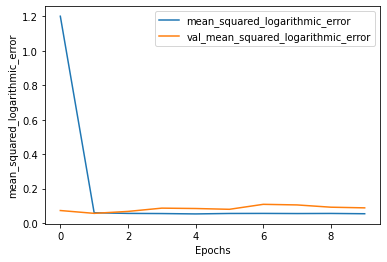

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')


In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
pred = np.squeeze(pred)
y_test = np.squeeze(np.array(y_test))
r2_score(y_test,pred)

0.2702364882770367